In [94]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')


[]

In [4]:
os.path.join('data','happy')

'data/happy'

In [ ]:
os.makedirs('data')
os.listdir('data')

[]

In [8]:
os.listdir(os.path.join('data','happy'))

['GettyImages-454356720.jpg',
 'Felicia-Boy-Girl-Names-That-Mean-Happy-or-Joy.webp',
 'getty_478389113_970647970450091_99776.jpg',
 'image9.jpeg',
 'AF2bZyiuJa_E75ZOKSBWunHqT38Rfp7yBAUdZAGZxHX-y6kfkpJls64-c-mo.jpg',
 'image31.jpeg',
 '1000_F_215088044_Ow0pypSekAamu3jZJnkRtfAyKj6KVlKj.jpg',
 'dorhh05t1kdqeylfo7i0.jpg',
 'happy.jpg',
 '640px-Happy_smiley_face.png',
 'Money_happiness__1_.jpeg',
 'happy-mature-woman-jogging-facebook-1200x628.png',
 'image11.jpeg',
 'things-that-make-you-happy-65b91ad8b43a5.jpg',
 'getty_505175324_325841.jpg',
 'ab4fcaa837f116411dfe4a1780dc251d00-26-happiness-feature-lede.2x.rvertical.w512.jpg',
 'how-to-be-happy2.jpg',
 'image33.jpeg',
 '05-12-21-happy-people.jpg',
 'image29.jpeg',
 '171120-smile-stock-njs-333p.jpg',
 'Happy-people-800x533.jpg',
 'image23.jpeg',
 'Happy-is-he-who-learns-to-bear-what-he-cannot-change..jpg',
 '960x0.jpg',
 'image6.jpeg',
 'image12.jpeg',
 'happy-people21.jpg',
 'do-you-think-you-re-happy-jgdbfiey-9bb0198eeccd0a3c3c13aed064e2

# Remove Dodgy Images

In [9]:
import cv2
import imghdr

In [10]:
data_dir='data'
image_exts=['jpeg','jpg','bmp','png']

In [23]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list data/sad/sad-phone-78zos33rrawf8wgo.jpg
Image not in ext list data/sad/sad-child-suffering-depression-sitting-260nw-2263300709.jpg
Image not in ext list data/sad/sad-1536X2048-wallpaper-stjfhe01th3x381q.jpeg
Image not in ext list data/sad/sad-1440X2560-wallpaper-htimc0dg1eltnhty.jpeg
Image not in ext list data/sad/sad-woman-pictures-o3e0tmn6tlnopntm.jpg
Issue with image data/sad/.ipynb_checkpoints
Image not in ext list data/sad/640px-SC3A9pulcre_Arc-en-Barrois_111008_12.jpg
Image not in ext list data/sad/sad-love-quotes.webp
Image not in ext list data/sad/sad-love-q5h8fdyc68az3g2q.jpg
Image not in ext list data/sad/sad-1440X2560-wallpaper-a1qoucp0n6vszd9p.jpeg
Image not in ext list data/sad/depositphotos_83965442-stock-photo-woman-silhouette-watching-sun-in.jpg
Image not in ext list data/sad/sadness-overview-guide-1440x810.jpg
Image not in ext list data/sad/InsideOut-Sadness-5.jpg
Image not in

In [12]:
os.path.join('data', 'happy','/content/data/happy/05-12-21-happy-people.jpg')

'/content/data/happy/05-12-21-happy-people.jpg'

In [14]:
img = cv2.imread('/content/data/happy/05-12-21-happy-people.jpg')

In [19]:
tip = imghdr.what('/content/data/happy/05-12-21-happy-people.jpg')

In [20]:
tip

'jpeg'

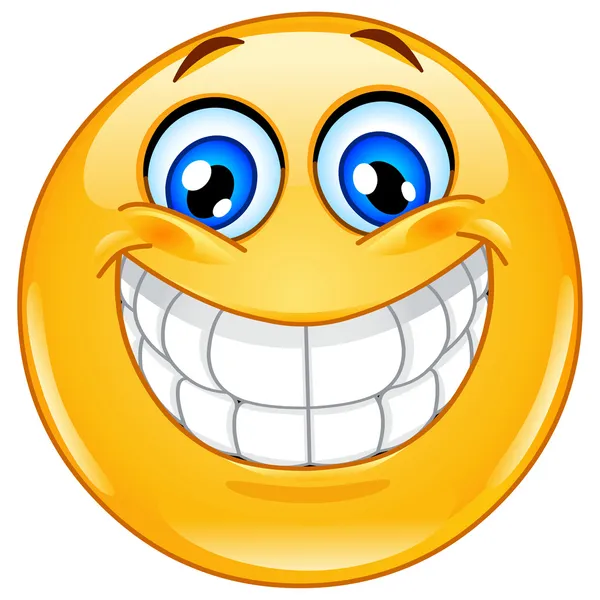

In [29]:
from google.colab.patches import cv2_imshow
cv2_imshow( img)

# Building Data

In [30]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 229 files belonging to 2 classes.


In [32]:
data_iterator=data.as_numpy_iterator()

In [52]:
batch=data_iterator.next()

In [53]:
batch[0].shape

(32, 256, 256, 3)

In [54]:
batch[1].shape

(32,)

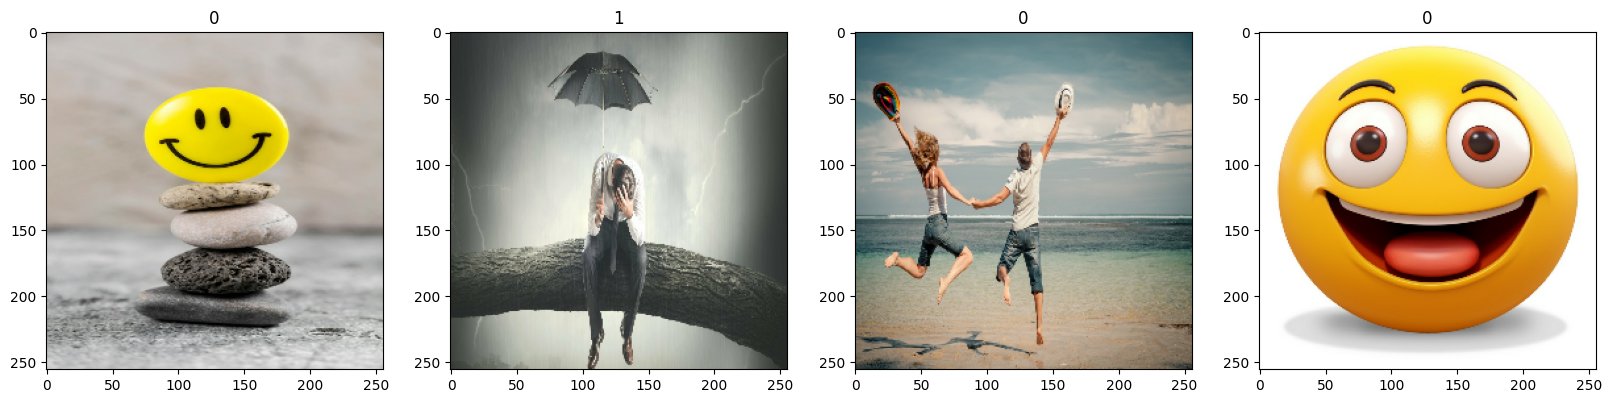

In [55]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocess Data

In [56]:
# Scaling data
data=data.map(lambda x,y: (x/255, y))

In [57]:
batch=data.as_numpy_iterator().next()

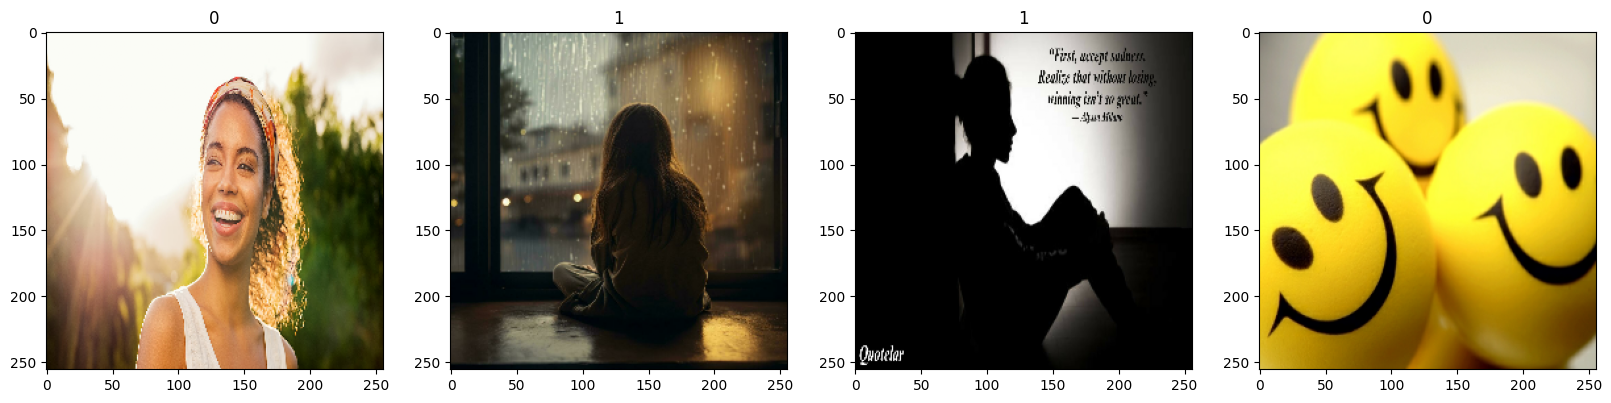

In [61]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [62]:
len(data)

8

In [71]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [73]:
train_size+val_size+test_size

8

In [76]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building deep model

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [81]:
model=Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [85]:
model.layers

# Training Data

In [86]:
logdir='logs'


In [87]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [88]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
5/5 [==============================] - 18s 3s/step - loss: 0.7111 - accuracy: 0.5125 - val_loss: 0.6178 - val_accuracy: 0.4844
Epoch 2/20
5/5 [==============================] - 15s 3s/step - loss: 0.5912 - accuracy: 0.6687 - val_loss: 0.5196 - val_accuracy: 0.7969
Epoch 3/20
5/5 [==============================] - 15s 3s/step - loss: 0.5093 - accuracy: 0.7688 - val_loss: 0.4207 - val_accuracy: 0.8750
Epoch 4/20
5/5 [==============================] - 14s 3s/step - loss: 0.3919 - accuracy: 0.8500 - val_loss: 0.3997 - val_accuracy: 0.8906
Epoch 5/20
5/5 [==============================] - 14s 3s/step - loss: 0.2855 - accuracy: 0.9000 - val_loss: 0.2093 - val_accuracy: 0.9219
Epoch 6/20
5/5 [==============================] - 15s 3s/step - loss: 0.1626 - accuracy: 0.9563 - val_loss: 0.2300 - val_accuracy: 0.9219
Epoch 7/20
5/5 [==============================] - 15s 2s/step - loss: 0.1426 - accuracy: 0.9500 - val_loss: 0.0699 - val_accuracy: 0.9844
Epoch 8/20
5/5 [==================

# Plotting Performance

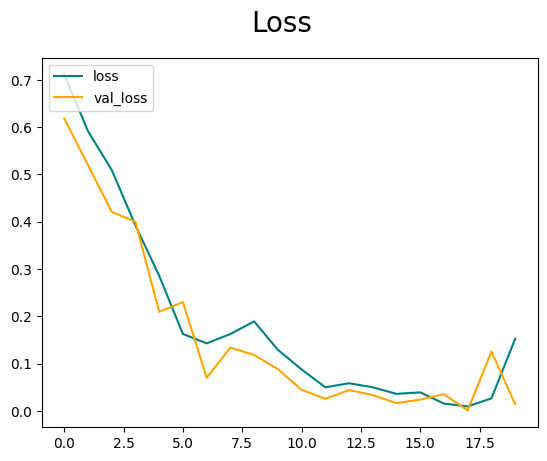

In [89]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

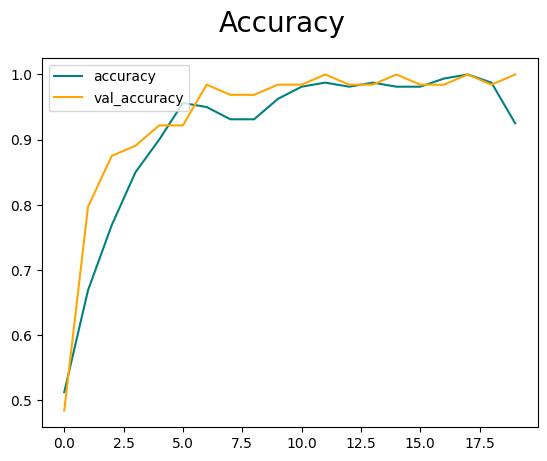

In [90]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Testing on New Data

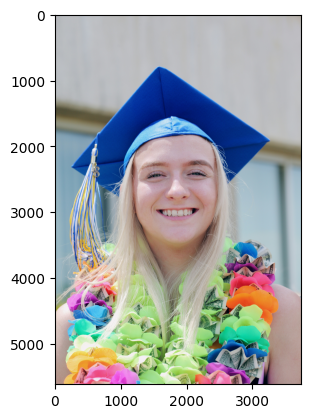

In [97]:
img = cv2.imread('/content/alexander-grey-EpsQ8oVcDj4-unsplash.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

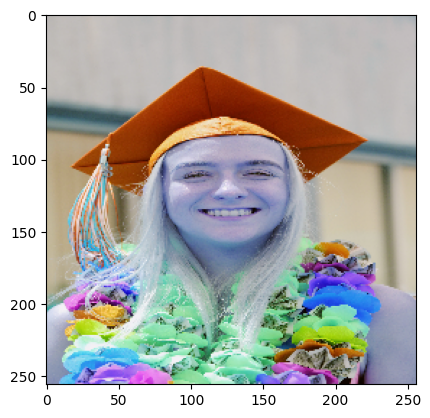

In [92]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [96]:
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

1/1 [==============================] - 0s 146ms/step
[[0.04712096]]
Predicted class is Happy


# Saving A model

In [98]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [101]:
new_model = load_model('/content/models/imageclassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

1/1 [==============================] - 0s 39ms/step
[[0.04712096]]
Predicted class is Happy
